# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

In [25]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df_energy = pd.read_csv('Energy.csv')
df_energy.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object

In [27]:
df_energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [28]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


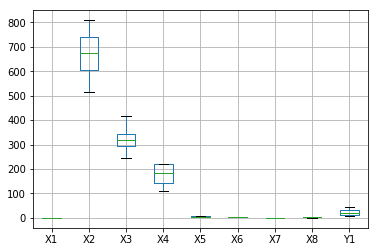

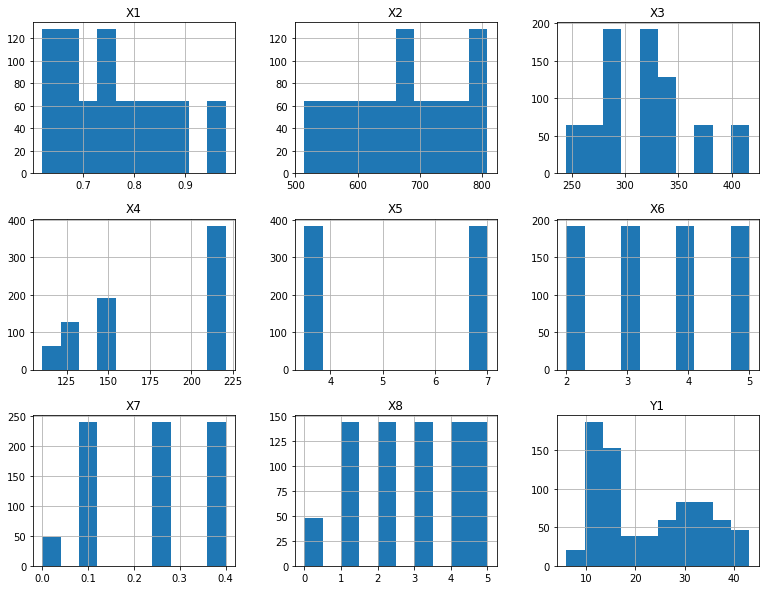

In [29]:
df_energy.boxplot()
df_energy.hist(figsize=(13,10))
plt.show()

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [30]:
df_train = df_energy.sample(frac=0.85, random_state=1)
df_test = df_energy.loc[~df_energy.index.isin(df_train.index)]
df_train.head()
#'Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation',
#'Glazing Area','Glazing Area Distribution'
x_train=df_train[['X1','X2','X3','X4','X5','X6','X7','X8']]
y_train=df_train['Y1']
x_test=df_test[['X1','X2','X3','X4','X5','X6','X7','X8']]
y_test=df_test['Y1']
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
lrm = linear_model.LinearRegression()
lrm.fit(x_train, y_train)
print(lrm.coef_)
print(lrm.intercept_)

[ -6.51273538e+01   5.45865377e+11  -5.45865377e+11  -1.09173075e+12
   4.31875224e+00   2.03479748e-02   1.97104305e+01   2.06084437e-01]
82.2604785605



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [31]:
y_pred_train = lrm.predict(x_train)
rms2_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('training error:',rms2_train)

y_pred_test = lrm.predict(x_test)
rms2_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('test error:',rms2_test)

training error: 2.95218574892
test error: 2.80015514166



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

[100, 200, 300, 400, 500, 653] [8.3561195237888182, 10.361883393606144, 9.5714840328655164, 8.9740758905807745, 8.7348930645252594, 8.7154006961395538] [7.5159980074304942, 7.755206066962324, 7.6203573519467396, 7.7011008063122368, 7.6905107157680597, 7.8408688173774665]


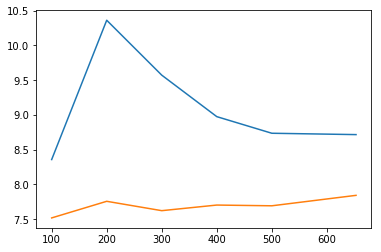

In [32]:
index=[100,200,300,400,500,len(x_train)]
reg = LinearRegression()
train_errors = []
test_errors = []
for i in index:
    X_train=x_train[:i]
    Y_train=y_train[:i]
    reg.fit(X_train, Y_train)
    Y_pred_train = reg.predict(X_train)
    Y_pred_test = reg.predict(x_test)
    train_err = mean_squared_error(Y_train, Y_pred_train)
    test_err = mean_squared_error(y_test, Y_pred_test)
    train_errors.append(train_err)
    test_errors.append(test_err)
print(index, train_errors, test_errors)
plt.plot(index, train_errors, index, test_errors)
plt.show()


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [33]:
df_test["Y1 class"] = pd.cut(df_test['Y1'], [0,15,30,100000],3, labels=['0','1','2'])
df_test.head()

/Users/ran/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y1 class
7,0.90,563.5,318.5,122.5,7.0,5,0.0,0,19.68,1
10,0.86,588.0,294.0,147.0,7.0,4,0.0,0,19.34,1
15,0.82,612.5,318.5,147.0,7.0,5,0.0,0,15.98,1
22,0.76,661.5,416.5,122.5,7.0,4,0.0,0,24.77,1
25,0.74,686.0,245.0,220.5,3.5,3,0.0,0,6.05,0


__ Q3.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
min_max_scaler = preprocessing.MinMaxScaler()

x=df_energy[['X1','X2','X3','X4','X5','X6','X7','X8']]
y=df_energy['Y1']
y = y.apply(np.int64)

x_minmax = min_max_scaler.fit_transform(x)
x_train_minmax, x_test_minmax, y_train, y_test = train_test_split(x_minmax, y, test_size=0.15)

logreg = LogisticRegression() # instantiate
logreg.fit(x_train_minmax,y_train) # fit
y_pred_train_minmax = logreg.predict(x_train_minmax) # predict
y_pred_test_minmax = logreg.predict(x_test_minmax) # predict

acc_log = sum(y_pred_train_minmax == y_train)/len(y_train)*100
print('Logistic Regression accuracy of train data:', str(round(acc_log,2)),'%')

y_pred_minmax_test = logreg.predict(x_test_minmax) # predict
acc_log = sum(y_pred_test_minmax == y_test)/len(y_test)*100
print('Logistic Regression accuracy of validation data:', str(round(acc_log,2)),'%')


Logistic Regression accuracy of train data: 36.96 %
Logistic Regression accuracy of validation data: 30.17 %


## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







In [35]:
#replace NaN
df_diabetes = pd.read_csv('diabetesdata.csv')
df_diabetes['TimesPregnant'].fillna((df_diabetes['TimesPregnant'].mean()), inplace=True)
df_diabetes['glucoseLevel'].fillna((df_diabetes['glucoseLevel'].mean()), inplace=True)
df_diabetes['BP'].fillna((df_diabetes['BP'].mean()), inplace=True)
df_diabetes['insulin'].fillna((df_diabetes['insulin'].mean()), inplace=True)
df_diabetes['BMI'].fillna((df_diabetes['BMI'].mean()), inplace=True)
df_diabetes['Pedigree'].fillna((df_diabetes['Pedigree'].mean()), inplace=True)
df_diabetes['Age'].fillna((df_diabetes['Age'].mean()), inplace=True)
df_diabetes['IsDiabetic'].fillna((df_diabetes['IsDiabetic'].mean()), inplace=True)
df_train1 = df_diabetes.sample(frac=0.8, random_state=1)
df_test1 = df_diabetes.loc[~df_energy.index.isin(df_train.index)]
x_train1=df_train1[['TimesPregnant','glucoseLevel','BP','insulin','BMI','Pedigree','Age']]
y_train1=df_train1['IsDiabetic']
x_test1=df_test1[['TimesPregnant','glucoseLevel','BP','insulin','BMI','Pedigree','Age']]
y_test1=df_test1['IsDiabetic']

In [36]:
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [37]:
#logistic regression
lg = LogisticRegression()
lg.fit(x_train1, y_train1)
y_lg_pred_train = lg.predict(x_train1)
y_lg_pred_test = lg.predict(x_test1)
acc_train_lg = round(lg.score(x_train1, y_train1) * 100, 2) 
acc_test_lg = round(lg.score(x_test1, y_test1) * 100, 2) 
print(acc_train_lg)
print(acc_test_lg)

77.85
76.52


In [38]:
#logistic regression
svc = svm.SVC()
svc.fit(x_train1, y_train1)
y_lg_pred_train = svc.predict(x_train1)
y_lg_pred_test = svc.predict(x_test1)
acc_train_lg = round(svc.score(x_train1, y_train1) * 100, 2) 
acc_test_lg = round(svc.score(x_test1, y_test1) * 100, 2) 
print(acc_train_lg)
print(acc_test_lg)

100.0
63.48


In [39]:
#perceptron
perceptron = Perceptron()
perceptron.fit(x_train1, y_train1)
y_perceptron_pred_train = perceptron.predict(x_train1)
y_perceptron_pred_test = perceptron.predict(x_test1)
acc_train_perceptron = round(perceptron.score(x_train1, y_train1) * 100, 2) 
acc_test_perceptron = round(perceptron.score(x_test1, y_test1) * 100, 2) 
print(acc_train_perceptron)
print(acc_test_perceptron)
# When I change python2 to python3, the warning messgae keeps showing up and I don't know if it has anything to do with the result,
# which is quite low comparing to other models. I have cleared output and re-run for several times, the result stays same

34.36
37.39


/Users/ran/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [40]:
#kNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train1, y_train1)
y_knn_pred_train = knn.predict(x_train1)
y_knn_pred_test = knn.predict(x_test1)
acc_train_knn = round(knn.score(x_train1, y_train1) * 100, 2) 
acc_test_knn = round(knn.score(x_test1, y_test1) * 100, 2) 
print(acc_train_knn)
print(acc_test_knn)

86.32
72.17


In [41]:
#xgboost
xgboost = xgb.XGBClassifier(n_estimators=1000)
xgboost.fit(x_train1, y_train1)
y__xgboost_train = xgboost.predict(x_train1)
y_xgboost_pred_test = xgboost.predict(x_test1)
acc_train_xgboost = round(xgboost.score(x_train1, y_train1) * 100, 2) 
acc_test_xgboost = round(xgboost.score(x_test1, y_test1) * 100, 2) 
print(acc_train_xgboost)
print(acc_test_xgboost)

100.0
74.78


In [42]:
#random forest
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train1, y_train1)
y__rf_train = rf.predict(x_train1)
y_rf_pred_test = rf.predict(x_test1)
acc_train_rf = round(rf.score(x_train1, y_train1) * 100, 2) 
acc_test_rf = round(rf.score(x_test1, y_test1) * 100, 2) 
print(acc_train_rf)
print(acc_test_rf)

100.0
71.3




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [43]:
df=pd.DataFrame()
df['BP_df'] = pd.cut(df_diabetes['BP'], 3, labels=['0','1','2'])
df['insulin_df'] = pd.cut(df_diabetes['insulin'],3, labels=['0','1','2'])
df['BMI_df'] = pd.cut(df_diabetes['BMI'],3, labels=['0','1','2'])
df['Pedigree_df'] = pd.cut(df_diabetes['Pedigree'],3, labels=['0','1','2'])
df.head()

,BP_df,insulin_df,BMI_df,Pedigree_df
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,0,0,1,2



__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [44]:
dataset = pd.read_csv('diabetesdata.csv')
dataset.BP = pd.cut(dataset.BP, 3, labels=[0,1,2])
dataset.BMI = pd.cut(dataset.BMI, 3, labels=[0,1,2])
dataset.Pedigree = pd.cut(dataset.Pedigree, 3, labels=[0,1,2])

data=[dataset]

In [45]:
guess_ages = np.zeros((3,3),dtype=int)
guess_gl = np.zeros((3,3),dtype=int)
                    
for i in range(0, 3):
    for j in range(0,3):
        guess_df_age = dataset[(dataset['BMI'] == i) \
                    &(dataset['BP'] == j)]['Age'].dropna()
        guess_df_gl = dataset[(dataset['BP'] == i) \
                    &(dataset['Pedigree'] == j)]['glucoseLevel'].dropna()
            # Extract the median age for this group
            # (less sensitive) to outliers
        age_guess = guess_df_age.median()
        gl_guess = guess_df_gl.median()
            # Convert random age float to int
        guess_ages[i,j] = int(age_guess)
        guess_gl[i,j] = int(gl_guess)
        
print('Guess_Age table:\n',guess_ages)
print('Guess_glucoseLevel table:\n',guess_gl)
print ('\nAssigning age and glucoseLevel values to NAN age and glucoseLevel values in the dataset...')
    
for i in range(0, 3):
    for j in range(0, 3):
        dataset.loc[ (dataset.Age.isnull()) & (dataset.BMI == i) \
                & (dataset.BP == j),'Age'] = guess_ages[i,j]
        dataset.loc[ (dataset.glucoseLevel.isnull()) & (dataset.BP == i) \
                & (dataset.Pedigree == j),'glucoseLevel'] = guess_gl[i,j]                    

dataset['Age'] = dataset['Age'].astype(int)
dataset['glucoseLevel'] = dataset['glucoseLevel'].astype(int)
print()
dataset.head()

Guess_Age table:
 [[24 25 55]
 [29 29 37]
 [33 32 31]]
Guess_glucoseLevel table:
 [[115 127 137]
 [112 115 149]
 [133 129 159]]

Assigning age and glucoseLevel values to NAN age and glucoseLevel values in the dataset...



,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148,1,0,1,0,50,1
1,1,112,1,0,1,0,31,0
2,8,183,1,0,1,0,29,1
3,1,112,1,94,1,0,21,0
4,0,137,0,168,1,2,33,1




__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [46]:
dataset.Age = pd.cut(dataset.Age, 5, labels=[0,1,2,3,4])
dataset.glucoseLevel = pd.cut(dataset.glucoseLevel, 5, labels=[0,1,2,3,4])
x = dataset.drop("IsDiabetic", axis=1) 
y = dataset["IsDiabetic"]
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.20)

In [47]:
#logistic regression
lg = LogisticRegression()
lg.fit(x_train1, y_train1)
y_lg_pred_train = lg.predict(x_train1)
y_lg_pred_test = lg.predict(x_test1)
acc_train_lg = round(lg.score(x_train1, y_train1) * 100, 2) 
acc_test_lg = round(lg.score(x_test1, y_test1) * 100, 2) 
print('accuracy of train for logistic regression:', acc_train_lg)
print('accuracy of test for logistic regression:', acc_test_lg)

#perceptron
perceptron = Perceptron()
perceptron.fit(x_train1, y_train1)
y_perceptron_pred_train = perceptron.predict(x_train1)
y_perceptron_pred_test = perceptron.predict(x_test1)
acc_train_perceptron = round(perceptron.score(x_train1, y_train1) * 100, 2) 
acc_test_perceptron = round(perceptron.score(x_test1, y_test1) * 100, 2) 
print('accuracy of train for Perceptron :', acc_train_perceptron)
print('accuracy of test for Perceptron :', acc_test_perceptron)

#random forest
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train1, y_train1)
y__rf_train = rf.predict(x_train1)
y_rf_pred_test = rf.predict(x_test1)
acc_train_rf = round(rf.score(x_train1, y_train1) * 100, 2) 
acc_test_rf = round(rf.score(x_test1, y_test1) * 100, 2) 
print('accuracy of train for randomforest :',acc_train_rf)
print('accuracy of test for randomforest :', acc_test_rf)

accuracy of train for logistic regression: 75.57
accuracy of test for logistic regression: 77.27
accuracy of train for Perceptron : 66.61
accuracy of test for Perceptron : 70.13


/Users/ran/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy of train for randomforest : 95.28
accuracy of test for randomforest : 75.32


### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a= \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})^2}{ \sum_{i}(X_i- \overline{X})}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____

i. 
Given a set of n points ($X_i$,$Y_i$) where $Y_i$ is dependent on $X_i$ by a linear relation, find the best-fit line,
$Z_i$=aX_i+b$

To that minimizes the sum of squared errors in Y,i.e:
\begin{equation}
minimize\sum_i{(Y_i-Z_i)^2}
\end{equation}

Suppose $SSE=min\sum_i{(Y_i-Z_i)^2}$

let $\frac{\partial SSE}{\partial b}=\sum{(2b-2(Y_i-aX_i))}$=$2nb-2\sum(X_i)$=$2nb=2n\bar Y+2an\bar X$=0

We can get
\begin{equation}
a=\frac{\sum(Y_i-\bar Y)(X_i-\bar X)}{\sum(X_i-\bar X)^2}
\end{equation}

ii.

$a=r.(\frac{S_y}{S_x})=\frac{cov(x,y)}{S_y.S_x}*\frac{cov(x,y)}{Var(x)}=\frac{n.cov(x,y)}{n.Var(x)}=\frac{\sum(Y_i-\bar Y)(X_i-\bar X)}{\sum(X_i-\bar X)^2}$

# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.presidency.ucsb.edu/debates.php


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




In [48]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) 
from __future__ import division, print_function
import pandas as pd
import numpy as np
import requests 
import bs4 as bs
from bs4 import BeautifulSoup
from collections import Counter
import re
import lxml.html
import urllib
import html5lib

In [49]:
#jy
source = requests.get('http://www.debates.org/index.php?page=debate-transcripts').content 
soup = bs.BeautifulSoup(source,'html.parser')
links=soup.find_all('a')
contents=[]
urls=[]
for i in links:
    if ('First'in i.text) & ('Presidential'in i.text) & ('Debate'in i.text):
        print("Info about{}:".format(i.text),i.get('href'))
        contents.append(i.text)
        urls.append(i.get('href'))
print(urls)

Info aboutOctober 3, 2012: The First Obama-Romney Presidential Debate: http://www.debates.org/index.php?page=october-3-2012-debate-transcript
Info aboutSeptember 26, 2008: The First McCain-Obama Presidential Debate: http://www.debates.org/index.php?page=2008-debate-transcript
Info aboutSeptember 30, 2004: The First Bush-Kerry Presidential Debate: http://www.debates.org/index.php?page=september-30-2004-debate-transcript
Info aboutOctober 3, 2000: The First Gore-Bush Presidential Debate: http://www.debates.org/index.php?page=october-3-2000-transcript
Info aboutOctober 6, 1996: The First Clinton-Dole Presidential Debate: http://www.debates.org/index.php?page=october-6-1996-debate-transcript
Info aboutSeptember 25, 1988: The First Bush-Dukakis Presidential Debate: http://www.debates.org/index.php?page=september-25-1988-debate-transcript
Info aboutOctober 7, 1984: The First Reagan-Mondale Presidential Debate: http://www.debates.org/index.php?page=october-7-1984-debate-transcript
Info aboutS

In [50]:
entries = None

for link in urls:
    debate = requests.get(link)
    debate = debate.content
    debate = BeautifulSoup(debate)
    debate_content = debate.find("div", {"id": "content-sm"})
    debate_content = debate_content.find_all("p")

    text = None
    for content in debate_content:
        if (text!=None):
            text = text + content.text
        else:
            text = content.text


    text = text.replace("\n", "").replace("\'", "'")
    # print(len(text))
    counts = Counter(re.findall(r"[\w']+", text.lower()))
    # print(counts.most_common()[0])
    # print(counts["war"])

    # entry = [headings[0]]
    entry = [len(text)]
    entry.append(counts["war"])
    entry.append(counts.most_common()[0][0])
    entry.append(counts.most_common()[0][1])
    
    if (entries!=None):
        entries.append(entry)
    else:
        entries = [entry]

entries
row_names = ["Debate char length", "war_count", "most_common_w", "most_common_w_count"]

df = pd.DataFrame(entries, index=contents, columns=row_names )
df = df.T
df

/Users/ran/anaconda2/envs/py3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/ran/anaconda2/envs/py3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


,"October 3, 2012: The First Obama-Romney Presidential Debate","September 26, 2008: The First McCain-Obama Presidential Debate","September 30, 2004: The First Bush-Kerry Presidential Debate","October 3, 2000: The First Gore-Bush Presidential Debate","October 6, 1996: The First Clinton-Dole Presidential Debate","September 25, 1988: The First Bush-Dukakis Presidential Debate","October 7, 1984: The First Reagan-Mondale Presidential Debate","September 23, 1976: The First Carter-Ford Presidential Debate","September 26, 1960: The First Kennedy-Nixon Presidential Debate"
Debate char length,94594,182386,82685,91040,93057,87458,86654,80701,60901
war_count,3,44,64,11,14,8,2,7,3
most_common_w,the,the,the,the,the,the,the,the,the
most_common_w_count,757,1470,857,919,876,803,865,856,778


    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)


In [54]:
datasets =["%02d" % x for x in range(1,28)]
print(datasets)
authors = []
for i in datasets:
    result = requests.get("http://people.sc.fsu.edu/~jburkardt/datasets/regression/x"+ format(i)+".txt")
    soup = BeautifulSoup(result.content)
    text = soup.find("p").text.splitlines()
    author = re.split(' and |, ',text[4])
    print(author)
    for name in author:
        authors.append(name.replace("#    ", "").replace(",", ""))
print(authors)
#set(authors)
j=Counter(authors)
print(j)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']


/Users/ran/anaconda2/envs/py3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/ran/anaconda2/envs/py3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    R J Freund', 'P D Minton,']
['#    D G Kleinbaum', 'L L Kupper,']
['#    Helmut Spaeth,']
['#    D G Kleinbaum', 'L L Kupper,']
['#    K A Brownlee,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    S Chatterjee', 'B Price,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    R J Freund', 'P D Minton,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    Helmut Spaeth,']
['#    S Chatterjee', 'B Price,']
['#    S Chatterjee', 'B Price,']
['#    S Chatterjee', 'B Price,']
['#    S C Narula', 'J F Wellington,']
['#    S C Narula', 'J F Wellington,']
['Helmut Spaeth', 'Helmut Spaeth', 'Helmut Spaeth', 'Helmut Spaeth', 'Helmut Spaeth', 'R J Freund', 'P D Minton', 'D G Kleinbaum', 'L L Kupper', 'Helmut Spaeth', 'D G Kleinbaum', 'L L Kupper', 'K A Brownlee', 'Helmut Spaeth', 'Helmut

In [52]:
df = pd.DataFrame.from_dict(j, orient='index').reset_index()
df = df.rename(columns={'index':'Authors', 0:'Counts'})
df = df.sort_values(by='Counts', ascending=False)
df

,Authors,Counts
0,Helmut Spaeth,16
6,S Chatterjee,4
7,B Price,4
1,R J Freund,2
2,P D Minton,2
3,D G Kleinbaum,2
4,L L Kupper,2
8,S C Narula,2
9,J F Wellington,2
5,K A Brownlee,1
